In [57]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv

# Process Information Taken from Raw Files

## Import our Previously Extracted Data

In [58]:
record_list = [] # Initialize the array that will hold the list of our records

records = 'mit-bih-dataframes/subject_list.csv' # Get our record list like we did in the initial extraction
with open(records) as rfile:# Load our records into the array
    for record in rfile:
        record = record[0:-1] # The -1 removes the newline ("\n") character from the string
        record_list.append(record)

In [59]:
subject_dataframes = [] # Initialize our dataframe array

for x in tqdm(record_list): # Extract our dataframes from the CSVs we saved previously
    subject_dataframes.append(pd.read_csv('mit-bih-dataframes/'+x+'.csv', index_col=0))
            # 'index_col=0' loads the index that is saved into the csv as the index rather than another column

100%|██████████| 23/23 [02:00<00:00,  5.23s/it]


In [60]:

# Now we get the indexes of the R-Peaks from our dataframes
qrs = [] # Initialize the array that will hold our list of R-Peaks for each subject

for subject in tqdm(subject_dataframes): # Load each subject
    qrs.append([idx for idx, x in enumerate(subject['R-Peak']) if x]) # Then we use list comprehension to get our r peaks for each subject
                                                                # Recall, the indices that the R-Peak column is true is where there is an r-peak
                                                                # So, we iterate through and identify which indices that is for each subject

100%|██████████| 23/23 [00:27<00:00,  1.19s/it]


## Extract RR-Intervals

In 2019, all of our developed variables were based on RR-Intervals, or the distance between adjacent R-Peaks. So, that is the first thing we extract 

In [61]:
rr_ints = [] # Initialize the array that will hold all of our subjects' RR-Intervals

# Then we want to Go through all of our data that holds our R-Peaks [That will be the qrs array]
# Iterating through that we want to extract the interval between each peak. 
# My suggested format is: 
"""
for each subject:
    for each rpeak sample_num in my current subject:
        subject_rrinterval.append( rpeak sample_num - the sample_num before it)
"""


rr_ints = [] # Initialize the array that will hold all of our subjects' RR-Intervals

for idx, subj in enumerate(qrs): # Iterate through our subjects data
    rr1 = [] # Initialize a temporary array that will store a single subject's RR-Intervals
    for idxs, r in enumerate(subj): # Iterate through the subject's R-Peaks
        if idxs == 0: # If it is the first peak we have no interval so go on to the next R-Peak
            next
        else:
            rr1.append(r - subj[idxs-1]) # Find the interval by taking the difference of the location of one R-Peak with the Location of the R-Peak before it
    rr_ints.append(rr1) # Add it to our master array

## Save the RR-Intervals 

In [62]:
reload_flag = False
for idx, subj in enumerate(tqdm(rr_ints)):
    if not os.path.exists("mit-bih-rr-intervalsd/"+record_list[idx]+".csv") or reload_flag:
        np.savetxt("mit-bih-rr-intervals/"+record_list[idx]+".csv", np.array(subj), delimiter=",")

100%|██████████| 23/23 [00:02<00:00, 10.11it/s]


In [63]:
#rrints_dataframe = []
#for idx, x in enumerate(tqdm(record_list)): 
#    subj = pd.DataFrame(data=np.transpose(np.array(rr_ints[idx])), columns=["RR Intervals"])
#    rrints_dataframe.append(subj)

In [64]:
#plt.figure(figsize=(30, 15), dpi=50)
#plt.rcParams["figure.dpi"] = 100
#fig, ax = plt.subplots()
#ax.boxplot(rr_ints)
#ax.set_title('RR Intervals For Subjects')
#ax.set_xlabel('Subject')
#ax.set_ylabel('RR Interval')
#plt.savefig('RR_Intervals.png')

In [65]:
#plt.figure(figsize=(20, 10), dpi=50)
#plt.hist(rr_ints[0], bins=100)
#plt.xlabel("RR Intervals", fontsize=20)
#plt.ylabel("Frequency", fontsize=20)
#plt.title("RR Ints for Subject 04015", fontsize=20)

In [66]:
#df_allcolors=[]
#for idx, subj in enumerate(tqdm(qrs)):
#    df_color=[]
#    for x in subj:
#        if subject_dataframes[idx].loc[x, 'Normal']:
#            df_color.append('green')
#        elif subject_dataframes[idx].loc[x, 'AFIB']:
#            df_color.append('red')
#        else:
#            df_color.append('orange')
#    df_allcolors.append(df_color)

In [67]:
#subj_number=0

#plt.figure(figsize=(20, 10), dpi=100)
#plt.scatter(range(len(rr_ints[subj_number])), rr_ints[subj_number], color=df_allcolors[subj_number][1:], s=3)


#legenddict = {
#    'Normal': 'green',
#    'AFIB': 'red',
#    'Other': 'orange'
#}

#handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in legenddict.values()]
#plt.legend(handlelist, legenddict.keys(), prop={"size": 20})
#plt.title('R-Peaks and Rhythms for Subject ' + str(record_list[subj_number]), fontsize=20)
#plt.ylabel('RR Interval', fontsize=20)
#plt.xlabel('Location', fontsize=20)
#plt.axhline(np.mean(rr_ints[subj_number]) + 3*np.std(rr_ints[subj_number]))
#plt.axhline(np.mean(rr_ints[subj_number]) - 3*np.std(rr_ints[subj_number]))
#plt.savefig("ColoredScatterPlot1.png")

#Code taken from following link: https://stackoverflow.com/questions/42180475/how-to-add-legend-to-scatter-plot-that-has-colour-assignment

In [68]:
#new_rrints = []
#for subj in rr_ints:
#    new_rrints.append([x for x in subj if x < 500])

In [69]:
#plt.figure(figsize=(20, 10), dpi=50)
#plt.hist(new_rrints[0], bins=100)
#plt.xlabel("RR Intervals", fontsize=20)
#plt.ylabel("Frequency", fontsize=20)
#plt.title("RR Ints for Subject 04015 After Filter", fontsize=20)

In [70]:
#plt.figure(figsize=(50, 25), dpi=50)
#fig, ax = plt.subplots()
#ax.boxplot(new_rrints)
#ax.set_title('RR Intervals For Subjects With Filter')
#ax.set_xlabel('Subject')
#ax.set_ylabel('RR Interval')
#plt.savefig('New_RR_Intervals.png')

In [71]:
#rhythm_dics = []
#header_dics = []

#for x in record_list:
#    with open('mit-bih-extracted/'+x+'_rhythms.pkl', mode='rb') as infile:
#        rhythm_dics.append(pickle.load(infile))
#    with open('mit-bih-extracted/'+x+'_headers.pkl', mode='rb') as infile:
#        header_dics.append(pickle.load(infile))

In [72]:
def plotPoincare(RRints):
    """
    Input    :
    
     - RRints: [list] of RR intervals
        
    Output   :
     - Poincare plot     
    """
    ax1 = RRints[:-1]
    ax2 = RRints[1:]   
    plt.scatter(ax1, ax2, c = 'r', s = 12)
    plt.xlabel('RR_n (s)')
    plt.ylabel('RR_n+1 (s)')
    plt.show()

def eclipseFittingMethod(RRints):
    """
    Input        :
    
     - RRints    : [list] of RR intervals
        
    Output       : 
             
      - SD1, SD2 : {dict} with keys 'SD1' (numpy.float64), representing short-term 
                   variation, and 'SD2' (numpy.float64), representing long-term
                   variation.   
    """
    SDSD =  np.std(np.diff(RRints))
    SDRR = np.std(RRints)
    SD1 = (1 / np.sqrt(2)) * SDSD #measures the width of poincare cloud
    SD2 = np.sqrt((2 * SDRR ** 2) - (0.5 * SDSD ** 2)) #measures the length of the poincare cloud
 
    return {'SD1': SD1, 'SD2': SD2}
    
def hraMethod(RRints):
    """
    Perform analysis to quantify heart rate assymmetry (HRA).
    
    Input           :
    
     - RRints       : [list] of RR intervals
        
    Output          :
     - C_DOWN, C_UP : {dict} with keys 'C_DOWN' (numpy.float64) and 
                      'C_UP' (numpy.float64)    
     """    
    ax1 = RRints[:-1]
    ax2 = RRints[1:]
    SD1I = np.sqrt((1 / len(ax1)) * (np.sum((ax1 - ax2) ** 2) / 2))
    ax1ax2 = (ax1 - ax2) / np.sqrt(2)
    indices_up = np.where(ax1ax2 > 0)
    indices_down = np.where(ax1ax2 < 0)
    SD1_UP = np.sqrt(np.sum(ax1ax2[indices_up] ** 2) / len(ax1))
    SD1_DOWN = np.sqrt(np.sum(ax1ax2[indices_down] ** 2) / len(ax1))    
    C_UP = SD1_UP ** 2 / SD1I ** 2 #for decelerations
    C_DOWN = SD1_DOWN ** 2 / SD1I ** 2 #for accelerations
    
    return {'C_UP': C_UP, 'C_DOWN': C_DOWN}

def correlationCoef(RRints):
    """
    Computes interbeat autocorrelation coefficient
    
    Input    :
    
     - RRints: [list] of RR intervals
        
    Output   : 
        
     - r_rr  : [numpy.float64] interbeat autocorrelation coefficient
 
     """    
    ax1 = RRints[:-1]
    ax2 = RRints[1:]
    mu_rr = np.mean(RRints)
    r_rr = np.mean((ax1 - mu_rr) * (ax2 - mu_rr)) / (np.sqrt(np.mean((ax1 - mu_rr) ** 2) * np.mean((ax2 - mu_rr) ** 2)))

    return r_rr
    
def plotRRintHist(RRints):
    """ 
    Histogram distribution of poincare points projected onto the x-axis
    
    Input    :
    
     - RRints: [list] of RR intervals
        
    Output   :
        
     - RR interval histogram plot    
    """    
    plt.hist(RRints, bins = 'auto')
    plt.xlabel('RR Interval')
    plt.ylabel('Number of RR Intervals')
    plt.title('RR Interval Histogram')
    plt.show()

def plotWidthHist(RRints):    
    """  
    Histogram distribution of poincare points projected along the direction of 
    line-of-identity, or along the line perpendicular to the line-of-identity.
    
    Input    :
    
     - RRints: [list] of RR intervals
        
    Output   :
        
     - 'Width', or delta-RR interval, histogram plot      
     """   
    ax1 = RRints[:-1]
    ax2 = RRints[1:]
    x1 = (np.cos(np.pi / 4) * ax1) - (np.sin(np.pi / 4) * ax2)
    plt.hist(x1, bins = 'auto')
    plt.title('Width (Delta-RR Interval) Histogram')
    plt.show()
    
def plotLengthHist(RRints):    
    """
    Histogram distribution of poincare points projected along the line-of-identty.
    
    Input    :
    
     - RRints: [list] of RR intervals
        
    Output   :
        
     - 'Length' histogram plot
     """
     
    ax1 = RRints[:-1]
    ax2 = RRints[1:]
    x2 = (np.sin(np.pi / 4) * ax1) + (np.cos(np.pi / 4) * ax2)
    plt.hist(x2, bins = 'auto')
    plt.title('Length Histogram')
    plt.show()

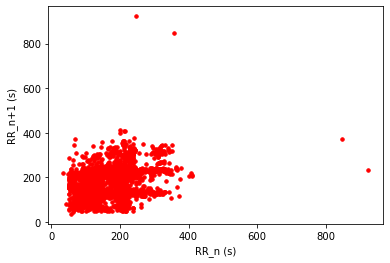

In [73]:
plotPoincare(rr_ints[0])

In [74]:
eclipseFittingMethod(rr_ints[0])

{'SD1': 17.576377587488654, 'SD2': 35.24872885231392}

In [75]:
#hraMethod(rr_ints[0])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [76]:
correlationCoef(rr_ints[0])

0.6017260527570604

In [77]:
# RMSSD: take the square root of the mean square of the differences
rmssd = np.sqrt(np.mean(np.square(np.diff(rr_ints[0]))))
print(rmssd)
# Mean RR
mean_rr = np.mean(rr_ints[0])
print(mean_rr)
# SDNN
sdnn = np.std(rr_ints[0])
print(sdnn)
# Mean HR
mean_hr = 60 * 1000/np.mean(rr_ints[0])
print(mean_hr)
# STD HR
##std_hr = np.std(hr)
# Min HR
##min_hr = np.min(hr)
# Max HR
##max_hr = np.max(hr)
# NNxx: sum absolute differences that are larger than 50ms
nnxx = np.sum(np.abs(np.diff(rr_ints[0])) > 50)*1
print(nnxx)
# pNNx: fraction of nnxx of all rr-intervals
pnnx = 100 * nnxx / len(rr_ints[0])
print(pnnx)
#Got code from https://blog.orikami.nl/exploring-heart-rate-variability-using-python-483a7037c64d

24.85675160965429
204.52413416962094
27.851408714838115
293.36391151882026


## What else to extract - some good places to start

- [Moody, 1983 - A new method for detecting atrial fibrillation using R-R intervals.](http://ecg.mit.edu/george/publications/afib-cinc-1983.pdf)
- [Lake, 2010 - Accurate estimation of entropy in very short physiological time series: the problem of atrial fibrillation detection in implanted ventricular devices](https://journals.physiology.org/doi/full/10.1152/ajpheart.00561.2010)
- [Rubio, 2011 - Estudio comparativo de algoritmos para la deteccion de la fibrilacion auricular](https://academica-e.unavarra.es/bitstream/handle/2454/4136/577570.pdf?sequence=1&isAllowed=y)
- [Ghodrati, 2008 - Statistical analysis of RR interval irregularities for detection of atrial fibrillation](https://ieeexplore.ieee.org/document/4749227)
- [Young, 1999 - A comparative study of a hidden Markov model detector for atrial fibrillation](https://ieeexplore.ieee.org/abstract/document/788166)